In [3]:
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from functools import partial

In [4]:
china = load_sample_image('china.jpg')/255
flower = load_sample_image('flower.jpg')/255

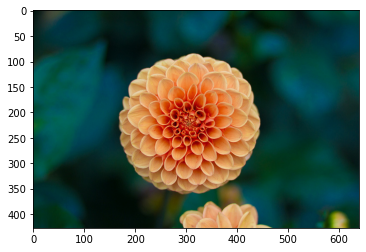

In [5]:
plt.imshow(flower)

In [6]:
china.shape

(427, 640, 3)

In [7]:
flower.shape

(427, 640, 3)

In [8]:
images = np.array([china, flower])

In [9]:
images.shape

(2, 427, 640, 3)

In [10]:
batch_size, height, width, channels = images.shape

In [11]:
filters = np.zeros(shape=(7,7,channels,2), dtype=np.float32)

In [12]:
filters[:,3,:,0]

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)

In [13]:
filters[:,3,:,0] = 1
filters[3,:,:,1] = 1

In [14]:
filters[:,:,0,0]

array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [15]:
filters[:,:,0,1]

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [16]:
outputs = tf.nn.conv2d(images, filters, strides=1, padding='SAME')

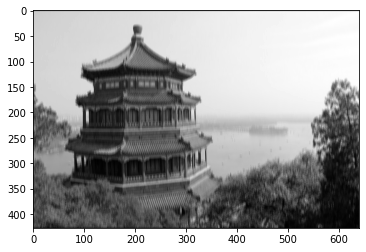

In [17]:
plt.imshow(outputs[0,:,:,0], cmap='gray')

In [18]:
max_pool = tf.keras.layers.MaxPool2D(pool_size=10)

In [19]:
pooled = max_pool(images[1:,:,:,:])


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



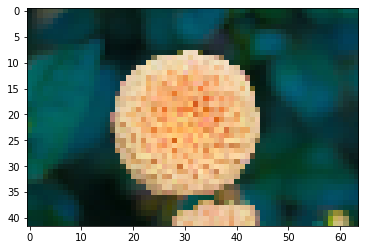

In [20]:
plt.imshow(pooled[0])

In [21]:
images[1:,:,:,:].shape

(1, 427, 640, 3)

In [22]:
pooled[0].shape

TensorShape([42, 64, 3])

In [23]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [24]:
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

In [25]:
print(X_train_full.shape)
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)
print(y_train_full.shape)
print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

(60000, 28, 28)
(55000, 28, 28)
(5000, 28, 28)
(10000, 28, 28)
(60000,)
(55000,)
(5000,)
(10000,)


In [26]:
X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

In [27]:
X_train.shape

(55000, 28, 28)

In [28]:
X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [29]:
X_train.shape

(55000, 28, 28, 1)

In [61]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

In [62]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
score = model.evaluate(X_test, y_test)
X_new = X_test[:10] # pretend we have new images
y_pred = model.predict(X_new)

Epoch 1/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.7077 - accuracy: 0.7495 - val_loss: 0.3826 - val_accuracy: 0.8590
Epoch 2/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.4294 - accuracy: 0.8531 - val_loss: 0.3542 - val_accuracy: 0.8720
Epoch 3/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3729 - accuracy: 0.8733 - val_loss: 0.3003 - val_accuracy: 0.8924
Epoch 4/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3411 - accuracy: 0.8840 - val_loss: 0.2937 - val_accuracy: 0.8886
Epoch 5/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3058 - accuracy: 0.8968 - val_loss: 0.2704 - val_accuracy: 0.9050
Epoch 6/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2939 - accuracy: 0.9002 - val_loss: 0.3036 - val_accuracy: 0.8980
Epoch 7/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2803 - accuracy: 0.9051 - val_loss: 0.2938 - val_ac

In [63]:
y_pred

array([[7.77554005e-38, 2.39607121e-34, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.21626970e-16, 0.00000000e+00, 2.58467622e-07,
        4.29508554e-34, 9.99999762e-01],
       [2.62627512e-14, 0.00000000e+00, 9.99999404e-01, 4.15437985e-30,
        5.93610772e-10, 0.00000000e+00, 6.39492441e-07, 0.00000000e+00,
        7.72561806e-26, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 3.11641368e-33,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [8.97203686e-34, 1.00000000e+00, 0.00000000e+00, 4.51750349e-26,
        1.41904843e-31, 0.00000000e+00, 6.82717935e-34, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.98931107e-03, 3.10742621e-12, 1.24433296e-04, 1.62487652e-06,
        8.36200779e-04, 2.95396052e-20, 9.97048438e-01, 1.52839453e-22,
        2.09658783e-11, 2.30709316e-21],
       [4.70958119e-37, 1.00000000e+00, 0.00000000e+00, 6.42649215e-28,
   

## ResNet-34

In [30]:
DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, strides=1, padding="SAME", use_bias=False)

class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides=1, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.main_layers = [
            DefaultConv2D(filters, strides=strides),
            keras.layers.BatchNormalization(),
            self.activation,
            DefaultConv2D(filters),
            keras.layers.BatchNormalization()]
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                DefaultConv2D(filters, kernel_size=1, strides=strides),
                keras.layers.BatchNormalization()]

    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)

In [32]:
model = keras.models.Sequential()
model.add(DefaultConv2D(64, kernel_size=7, strides=2,
                        input_shape=[28, 28, 1]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="SAME"))
prev_filters = 64
for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
    strides = 1 if filters == prev_filters else 2
    model.add(ResidualUnit(filters, strides=strides))
    prev_filters = filters
model.add(keras.layers.GlobalAvgPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation="softmax"))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 64)        3136      
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
residual_unit (ResidualUnit) (None, 7, 7, 64)          74240     
_________________________________________________________________
residual_unit_1 (ResidualUni (None, 7, 7, 64)          74240     
_________________________________________________________________
residual_unit_2 (ResidualUni (None, 7, 7, 64)          7

In [34]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
score = model.evaluate(X_test, y_test)
X_new = X_test[:10] # pretend we have new images
y_pred = model.predict(X_new)

Epoch 1/10
1719/1719 [==============================] - 83s 49ms/step - loss: 0.5123 - accuracy: 0.8238 - val_loss: 0.5005 - val_accuracy: 0.8272
Epoch 2/10
1719/1719 [==============================] - 82s 48ms/step - loss: 0.3517 - accuracy: 0.8755 - val_loss: 0.3836 - val_accuracy: 0.8572
Epoch 3/10
1719/1719 [==============================] - 82s 48ms/step - loss: 0.3111 - accuracy: 0.8882 - val_loss: 0.3046 - val_accuracy: 0.8850
Epoch 4/10
1719/1719 [==============================] - 82s 48ms/step - loss: 0.2851 - accuracy: 0.8983 - val_loss: 0.2712 - val_accuracy: 0.8988
Epoch 5/10
1719/1719 [==============================] - 82s 48ms/step - loss: 0.2534 - accuracy: 0.9075 - val_loss: 0.2669 - val_accuracy: 0.9010
Epoch 6/10
1719/1719 [==============================] - 82s 48ms/step - loss: 0.2528 - accuracy: 0.9097 - val_loss: 0.2566 - val_accuracy: 0.9036
Epoch 7/10
1719/1719 [==============================] - 82s 48ms/step - loss: 0.2147 - accuracy: 0.9223 - val_loss: 0.4892 -